<a href="https://colab.research.google.com/github/Devanshi-123/stock_market_prediction/blob/main/Stock_Market_Prediction(Non_Metals)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Stock Market Prediction Using Different Machine Learning And Deep Learning Algorithms**


## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cd /content/drive/My Drive/Stock Market Prediction(Mini Project)

/content/drive/My Drive/Stock Market Prediction(Mini Project)


## **Importing the dataset**

In [ ]:
##Metallic Dataset
df=pd.read_csv("Stock_KSIM1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3546 non-null   int64  
 1   <TICKER>      3546 non-null   object 
 2   <DTYYYYMMDD>  3546 non-null   int64  
 3   <FIRST>       3546 non-null   float64
 4   <HIGH>        3546 non-null   float64
 5   <LOW>         3546 non-null   float64
 6   <CLOSE>       3546 non-null   float64
 7   <VALUE>       3546 non-null   int64  
 8   <VOL>         3546 non-null   int64  
 9   <OPENINT>     3546 non-null   int64  
 10  <PER>         3546 non-null   object 
 11  <OPEN>        3546 non-null   float64
 12  <LAST>        3546 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 360.3+ KB


In [ ]:
df.head()

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,0,Calcimine,20010501,5750.0,5750.0,5750.0,5750.0,575000,100,1,D,5750.0,5750.0
1,1,Calcimine,20010506,5807.0,5807.0,5807.0,5807.0,9947391,1713,3,D,5750.0,5807.0
2,2,Calcimine,20010512,5865.0,5865.0,5865.0,5865.0,2991150,510,2,D,5807.0,5865.0
3,3,Calcimine,20010513,5923.0,5923.0,5923.0,5923.0,11846000,2000,2,D,5865.0,5923.0
4,4,Calcimine,20010515,5982.0,5982.0,5982.0,5982.0,5982000,1000,1,D,5923.0,5982.0


## **Exploratory Data Analysis**

In [ ]:
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,3546.000000,3.546000e+03,3546.000000,3546.000000,3546.000000,3546.000000,3.546000e+03,3.546000e+03,3546.000000,3546.000000,3546.000000
mean,1772.500000,2.011695e+07,8603.097857,8720.517202,8469.620135,8601.823463,1.865224e+10,2.024808e+06,404.249295,8585.450931,8594.951213
std,1023.786355,5.191054e+04,6669.430644,6763.880904,6564.485202,6682.042300,5.608826e+10,3.329542e+06,672.187749,6660.965520,6677.021620
min,0.000000,2.001050e+07,1305.000000,1305.000000,1305.000000,1305.000000,4.518000e+04,1.000000e+01,1.000000,1305.000000,1305.000000
25%,886.250000,2.007121e+07,3840.000000,3890.000000,3784.000000,3828.000000,1.053480e+09,1.356290e+05,53.000000,3827.250000,3820.000000
50%,1772.500000,2.012072e+07,7112.000000,7200.000000,7000.000000,7099.500000,4.940772e+09,8.506735e+05,223.000000,7083.000000,7094.000000
75%,2658.750000,2.016071e+07,10914.500000,11000.000000,10731.500000,10883.000000,1.466050e+10,2.499011e+06,489.750000,10857.750000,10896.750000
max,3545.000000,2.020060e+07,42650.000000,43000.000000,40660.000000,42504.000000,1.322401e+12,4.071108e+07,14028.000000,42504.000000,42703.000000


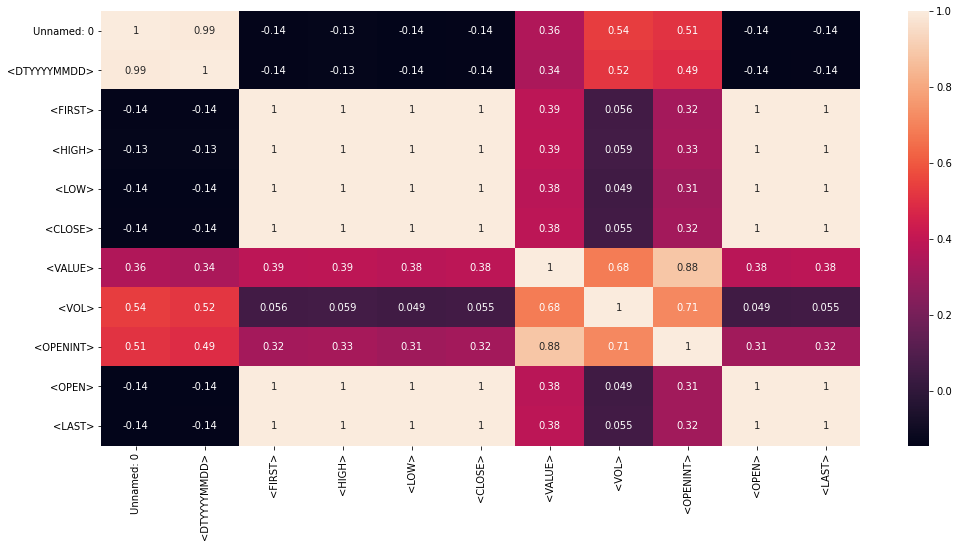

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [ ]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-05-01,5750.0,5750.0,5750.0,5750.0,575000,100
2001-05-06,5807.0,5807.0,5807.0,5807.0,9947391,1713
2001-05-12,5865.0,5865.0,5865.0,5865.0,2991150,510
2001-05-13,5923.0,5923.0,5923.0,5923.0,11846000,2000
2001-05-15,5982.0,5982.0,5982.0,5982.0,5982000,1000


In [ ]:
df_new.shape

(3546, 6)

In [ ]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Data Visualisation**

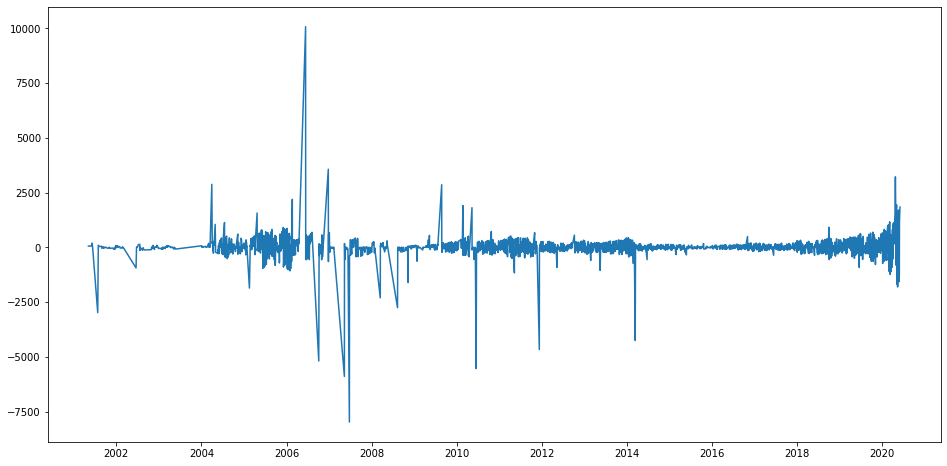

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

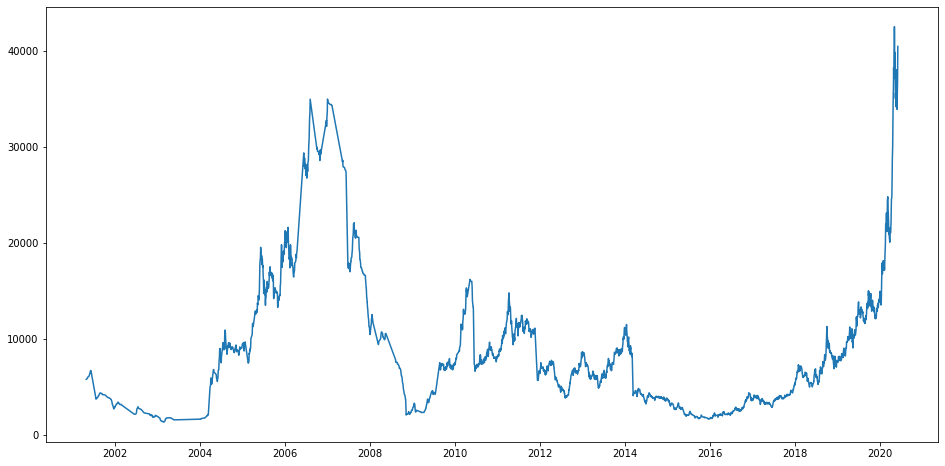

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

## **Calculating the technical indicators**

In [ ]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2


In [ ]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059


In [ ]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374,-4663.0
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033,-1685.0
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027,1797.0
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295,3027.0
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059,6277.0


In [ ]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374,-4663.0,0.291534
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033,-1685.0,0.834140
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027,1797.0,NaN
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295,3027.0,0.984724
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059,6277.0,0.949051


In [ ]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374,-4663.0,0.291534,0.419589
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033,-1685.0,0.834140,0.495334
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027,1797.0,NaN,0.495334
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295,3027.0,0.984724,0.600269
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059,6277.0,0.949051,0.672694


In [ ]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [ ]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2001-05-01,5750.0,5750.0,5750.0,5750.0,575000,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-06,5807.0,5807.0,5807.0,5807.0,9947391,1713,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-12,5865.0,5865.0,5865.0,5865.0,2991150,510,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-13,5923.0,5923.0,5923.0,5923.0,11846000,2000,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-15,5982.0,5982.0,5982.0,5982.0,5982000,1000,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#8. Larry Williams R%
#lEFT

In [ ]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374,-4663.0,0.291534,0.419589,1266.534887,2158.477473,-891.942586,-0.899763
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033,-1685.0,0.834140,0.495334,1094.286967,1945.639372,-851.352406,-1.441125
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027,1797.0,NaN,0.495334,1086.625069,1773.836511,-687.211443,NaN
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295,3027.0,0.984724,0.600269,1212.785974,1661.626404,-448.840430,-4.146097
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059,6277.0,0.949051,0.672694,1444.270604,1618.155244,-173.884640,0.464400


In [ ]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,34051.0,35000.0,33429.0,33887.0,91075271139,2688840,-1301.0,35695.6,35967.692374,-4663.0,0.291534,0.419589,1266.534887,2158.477473,-891.942586,-0.899763,-1.379473
2020-05-27,32466.0,35565.0,32466.0,35051.0,188533230075,5378788,1164.0,35527.1,35801.021033,-1685.0,0.834140,0.495334,1094.286967,1945.639372,-851.352406,-1.441125,-0.962640
2020-05-30,36803.0,36803.0,36803.0,36803.0,112049162498,3044566,1752.0,35706.8,35983.199027,1797.0,NaN,0.495334,1086.625069,1773.836511,-687.211443,NaN,0.878543
2020-05-31,38643.0,38643.0,36810.0,38615.0,771614696040,19982276,1812.0,36009.5,36461.708295,3027.0,0.984724,0.600269,1212.785974,1661.626404,-448.840430,-4.146097,1.406626
2020-06-01,40490.0,40545.0,38700.0,40451.0,266346818518,6584463,1836.0,36637.2,37187.034059,6277.0,0.949051,0.672694,1444.270604,1618.155244,-173.884640,0.464400,1.838765


In [ ]:
df_new.mean()

<FIRST>            8.603098e+03
<HIGH>             8.720517e+03
<LOW>              8.469620e+03
<CLOSE>            8.601823e+03
<VALUE>            1.865224e+10
<VOL>              2.024808e+06
change_in_price    9.788717e+00
MA_10              8.568869e+03
WMA_10             8.568839e+03
MOM_10             8.660436e+01
SO_k                        NaN
SO_10              4.549134e-01
MACD_12_26         5.847584e+01
MACDsign_12_26     5.717177e+01
MACDdiff_12_26     2.158280e+00
Acc/Dist_ROC_10             NaN
CCI_10             5.258992e-02
dtype: float64

In [ ]:
df_new.min()

<FIRST>            1.305000e+03
<HIGH>             1.305000e+03
<LOW>              1.305000e+03
<CLOSE>            1.305000e+03
<VALUE>            4.518000e+04
<VOL>              1.000000e+01
change_in_price   -7.981000e+03
MA_10              1.346300e+03
WMA_10             1.371534e+03
MOM_10            -1.022100e+04
SO_k                       -inf
SO_10             -1.365027e+01
MACD_12_26        -3.400683e+03
MACDsign_12_26    -3.055329e+03
MACDdiff_12_26    -1.081572e+03
Acc/Dist_ROC_10            -inf
CCI_10            -2.845202e+00
dtype: float64

In [ ]:
df_new.max()

<FIRST>            4.265000e+04
<HIGH>             4.300000e+04
<LOW>              4.066000e+04
<CLOSE>            4.250400e+04
<VALUE>            1.322401e+12
<VOL>              4.071108e+07
change_in_price    1.007700e+04
MA_10              3.948840e+04
WMA_10             3.844612e+04
MOM_10             1.391100e+04
SO_k                        inf
SO_10              1.105947e+01
MACD_12_26         4.900759e+03
MACDsign_12_26     4.247434e+03
MACDdiff_12_26     1.352562e+03
Acc/Dist_ROC_10             inf
CCI_10             2.811525e+00
dtype: float64

In [ ]:
df_new.std()

<FIRST>            6.669431e+03
<HIGH>             6.763881e+03
<LOW>              6.564485e+03
<CLOSE>            6.682042e+03
<VALUE>            5.608826e+10
<VOL>              3.329542e+06
change_in_price    4.226386e+02
MA_10              6.583125e+03
WMA_10             6.565135e+03
MOM_10             1.604955e+03
SO_k                        NaN
SO_10              1.194016e+00
MACD_12_26         6.114367e+02
MACDsign_12_26     5.783136e+02
MACDdiff_12_26     1.727040e+02
Acc/Dist_ROC_10             NaN
CCI_10             1.278361e+00
dtype: float64

## **Normalizing Data**

In [ ]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.615501,0.630279,0.634211,0.613733,0.054766,0.016311,-0.072588,0.711202,0.739020,-0.196818,NaN,-0.001430,0.145524,0.287741,-0.367318,NaN,-0.253161
2020-05-27,0.577165,0.643830,0.609742,0.641986,0.128464,0.082385,0.063917,0.706784,0.734524,-0.073413,NaN,0.001636,0.124775,0.258596,-0.350642,NaN,-0.179473
2020-05-30,0.682063,0.673522,0.719944,0.684511,0.070627,0.025049,0.096479,0.711495,0.739438,0.070877,NaN,0.001636,0.123852,0.235071,-0.283209,NaN,0.146013
2020-05-31,0.726567,0.717652,0.720121,0.728493,0.569390,0.441096,0.099801,0.719432,0.752345,0.121846,NaN,0.005883,0.139049,0.219705,-0.185281,NaN,0.239367
2020-06-01,0.771240,0.763269,0.768146,0.773057,0.187307,0.112000,0.101130,0.735888,0.771909,0.256522,NaN,0.008814,0.166934,0.213752,-0.072323,NaN,0.315761


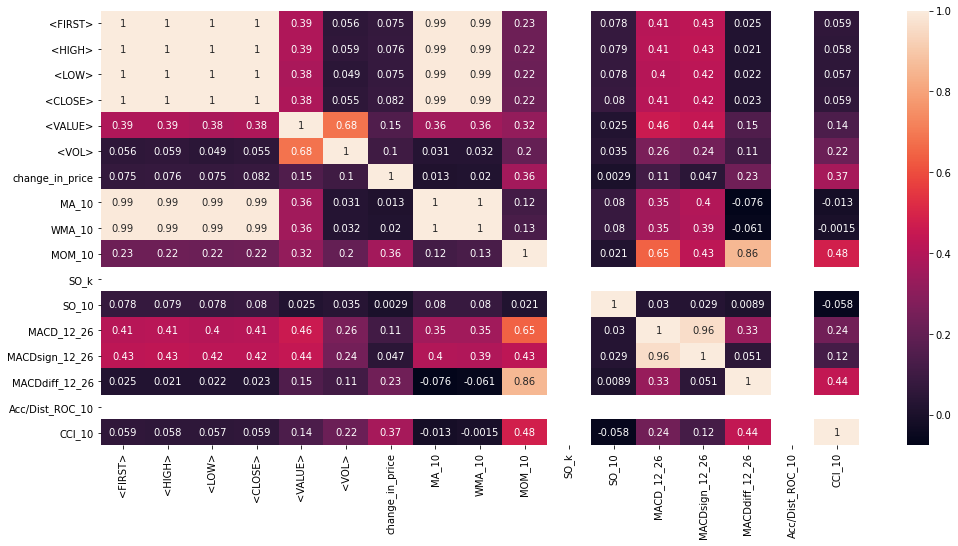

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [ ]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               3546
SO_10                37
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    3546
CCI_10                9
dtype: int64

In [ ]:
#Removing the null values
data = data.fillna(data.mean())

In [ ]:
data = data.dropna(how="all",axis=1)

In [ ]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-26,0.711202,0.739020,-0.196818,-0.001430,0.145524,0.287741,-0.367318,-0.253161
2020-05-27,0.706784,0.734524,-0.073413,0.001636,0.124775,0.258596,-0.350642,-0.179473
2020-05-30,0.711495,0.739438,0.070877,0.001636,0.123852,0.235071,-0.283209,0.146013
2020-05-31,0.719432,0.752345,0.121846,0.005883,0.139049,0.219705,-0.185281,0.239367
2020-06-01,0.735888,0.771909,0.256522,0.008814,0.166934,0.213752,-0.072323,0.315761


In [ ]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.613733
2020-05-27    0.641986
2020-05-30    0.684511
2020-05-31    0.728493
2020-06-01    0.773057
Name: <CLOSE>, dtype: float64

In [ ]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

## Visualising the technical indicators i.e. our features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c74896320>,
      dtype=object)

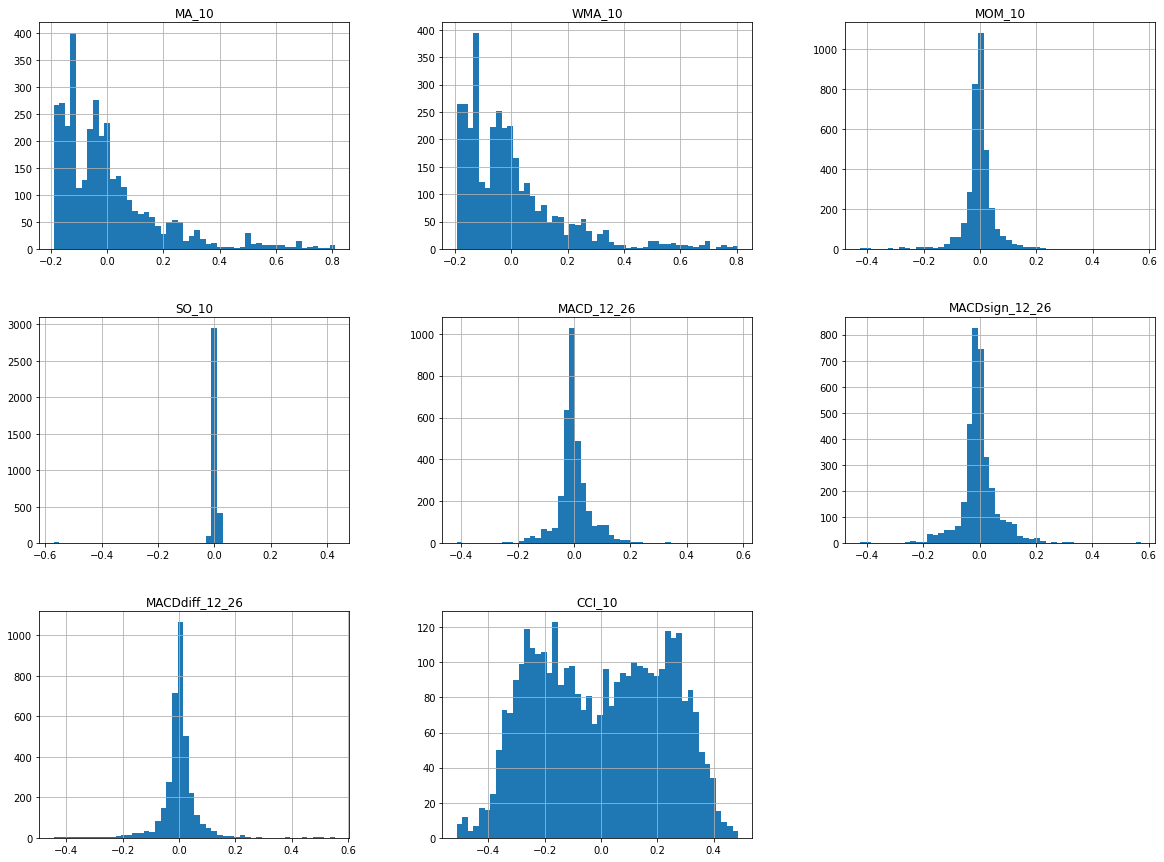

In [ ]:
X.hist(bins=50,figsize=(20,15))

In [ ]:
#Splitting data into training and test set
#from sklearn.model_selection import train_test_split
total_days = len(X)
hold_days=30
x_train = X[0:(total_days-hold_days)]
y_train = Y[0:(total_days-hold_days)]

# Predicting using Decision Trees

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Evaluating the Model

In [ ]:
y_pred = Regressor.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

0.013266401373820368

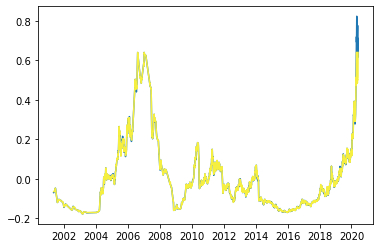

In [ ]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred, c='#f5ef42')
plt.show()

# Using Bagging Regressor

In [ ]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [ ]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)
    

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=10,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tru

## Evaluating Bagging Regressor

In [ ]:
y_pred_br = regr.predict(X)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.012214181180964746

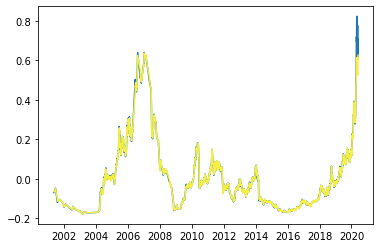

In [ ]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_br, c='#f5ef42')
plt.show()

# Using Random Forest

In [ ]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## Evaluating Random Forest

In [ ]:
y_pred_rf = rf.predict(X)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.013249777681027575

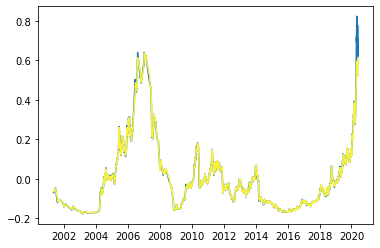

In [ ]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_rf, c='#f5ef42')
plt.show()

 ## Using AdaBoost Regressor

In [ ]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

## Evaluating AdaBoost Regressor

In [ ]:
y_pred_adb = adb_reg.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.01302924691946358

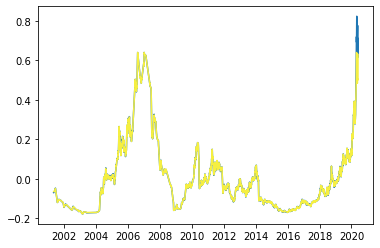

In [ ]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_adb, c='#f5ef42')
plt.show()

## Using Gradient Boosting

In [ ]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluating gradient boosting

In [ ]:
y_pred_gdbt = gdbt.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.013701336864860006

##Using Deep Learning Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Using ANN

### Importing Libraries

In [ ]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

### Building the ANN Model


In [ ]:
classifier = Sequential() 
classifier.add(Dense(units=50,activation = "relu",input_shape = (X_train.shape[1], 1))) 
classifier.add(Dense(units=50,activation = "relu")) 
classifier.add(Dense(activation = "sigmoid", units = 1)) 
classifier.compile(optimizer = 'adam' , loss = 'mean_squared_error' ) 

In [ ]:
classifier.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
110/110 [==============================] - 0s 2ms/step - loss: 0.1176
Epoch 2/15
110/110 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 3/15
110/110 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 4/15
110/110 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 5/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 6/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 7/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 8/15
110/110 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 9/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 10/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 11/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 12/15
110/110 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 13/15
110/110 [====

In [ ]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = classifier.predict(X_test)

In [ ]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [ ]:
predicted_stock_price

array([[[1.12428159e-01],
        [1.14908546e-01],
        [2.39646435e-03],
        [6.91685081e-03],
        [1.52629614e-03],
        [1.57633424e-03],
        [2.89657712e-03],
        [3.55213881e-04]],

       [[4.54008579e-04],
        [4.30703163e-04],
        [5.65999746e-03],
        [6.55516982e-03],
        [3.78620625e-03],
        [3.38625908e-03],
        [7.32654333e-03],
        [9.86159742e-02]],

       [[8.65727663e-04],
        [8.38249922e-04],
        [7.22676516e-03],
        [6.26397133e-03],
        [6.26260042e-03],
        [5.74535131e-03],
        [7.75671005e-03],
        [2.88502574e-02]],

       [[8.24540854e-04],
        [7.81863928e-04],
        [4.22275066e-03],
        [8.83281231e-03],
        [3.66529822e-03],
        [3.63561511e-03],
        [4.83468175e-03],
        [1.31726265e-04]],

       [[5.20578027e-03],
        [5.08034229e-03],
        [6.07788563e-03],
        [6.24105334e-03],
        [1.29311681e-02],
        [1.50160789e-02],
    

In [ ]:
real_stock_price

array([ 0.19690227, -0.1592957 , -0.11320235, -0.12257151, -0.0024715 ,
        0.19394103, -0.08633276,  0.04197132,  0.62909722, -0.00943769,
       -0.00157342, -0.05975445, -0.02312734, -0.12223169, -0.01135521,
       -0.11191591,  0.01954359, -0.04565216,  0.1296919 , -0.10885758,
       -0.14805756,  0.27030211, -0.02232635, -0.14575168, -0.06213315,
       -0.16606771, -0.04659879, -0.0989787 ,  0.00866954,  0.00500441,
        0.51050211, -0.04089477,  0.07396239,  0.32343447, -0.00302977,
       -0.16046077, -0.04043359, -0.12817844, -0.11043529,  0.29413764,
        0.46737   , -0.03261787, -0.12987751, -0.10533808,  0.45567068,
        0.01277159, -0.11601795,  0.00541704, -0.12104234, -0.11344507,
       -0.00577255, -0.112013  ,  0.12755592, -0.16592207, -0.12939206,
        0.27906446,  0.10973996, -0.16715997,  0.00255289, -0.11242563,
        0.23498572, -0.06710899, -0.11016829, -0.04453563, -0.01895249,
       -0.0013307 ,  0.27940427, -0.09946415, -0.07101686, -0.14

In [ ]:
""" plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction Using ANN')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show() """ #error

" plt.figure(figsize=(20,10))\nplt.plot(real_stock_price, color = 'green', label = 'Stock Price')\nplt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')\nplt.title('Stock Price Prediction Using ANN')\nplt.xlabel('Trading Day')\nplt.ylabel('Stock Price')\nplt.legend()\nplt.show() "

## Using LSTM

### Importing libraries

In [ ]:
pip install nsepy

In [ ]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Compiling and training the model defined in the above step.
(Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.)

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
110/110 [==============================] - 3s 25ms/step - loss: 0.0044
Epoch 2/15
110/110 [==============================] - 2s 20ms/step - loss: 6.5382e-04
Epoch 3/15
110/110 [==============================] - 2s 20ms/step - loss: 5.9109e-04
Epoch 4/15
110/110 [==============================] - 2s 19ms/step - loss: 4.7842e-04
Epoch 5/15
110/110 [==============================] - 2s 21ms/step - loss: 5.1958e-04
Epoch 6/15
110/110 [==============================] - 2s 22ms/step - loss: 5.9382e-04
Epoch 7/15
110/110 [==============================] - 2s 22ms/step - loss: 5.0959e-04
Epoch 8/15
110/110 [==============================] - 2s 21ms/step - loss: 4.2392e-04
Epoch 9/15
110/110 [==============================] - 2s 18ms/step - loss: 4.1295e-04
Epoch 10/15
110/110 [==============================] - 2s 19ms/step - loss: 4.8293e-04
Epoch 11/15
110/110 [==============================] - 2s 18ms/step - loss: 4.7255e-04
Epoch 12/15
110/110 [==============================] - 2

In [ ]:
X_test = np.array(X)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [ ]:
real_stock_price = np.asarray(Y)
# real_stock_price=real_stock_price.reshape(1167,1)

In [ ]:
predicted_stock_price

array([[0.00133786],
       [0.00133786],
       [0.00133786],
       ...,
       [0.6684393 ],
       [0.68381995],
       [0.71631044]], dtype=float32)

In [ ]:
real_stock_price

array([-0.0692207 , -0.06783717, -0.06642937, ...,  0.68451119,
        0.72849284,  0.77305703])

### Plotting the results

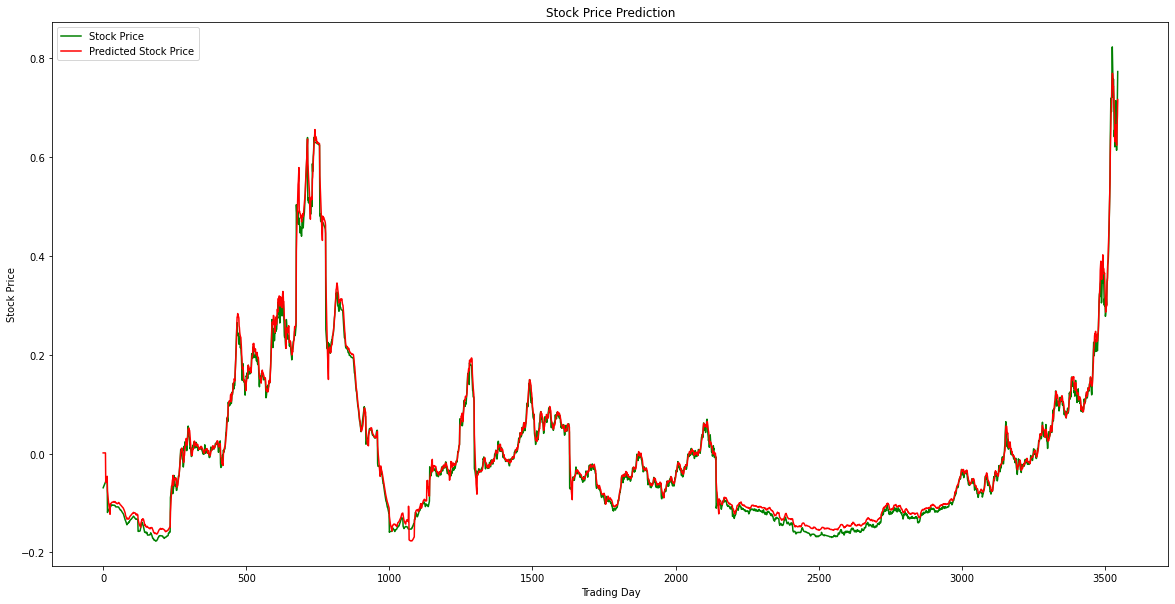

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.013017993529499682